In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from statsforecast.models import AutoARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
###

In [14]:
df = pd.read_csv("Part 2 Social Network Forecasting\monthly_rev.csv").drop("Unnamed: 0", axis=1)
df['date'] = pd.to_datetime(df['date'])


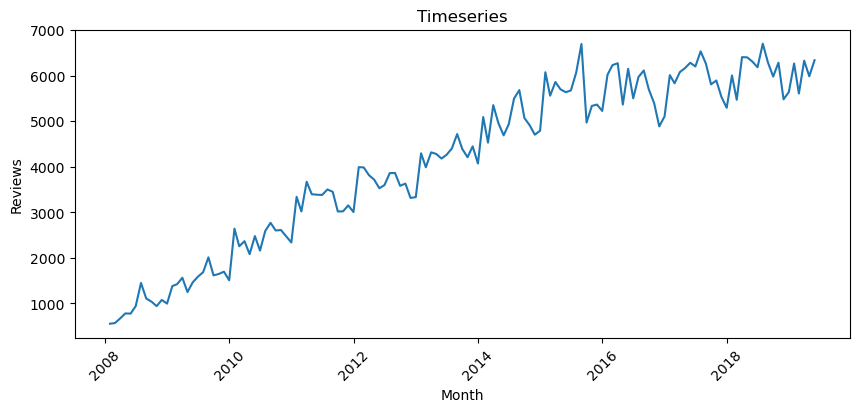

In [16]:
#plot
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['count'])  
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('Timeseries')
plt.xticks(rotation=45)
plt.show()

In [24]:
values = df['count'].values

In [71]:
df = df[['date', 'count']]
df

,date,count
0,2008-01-31,555
1,2008-02-29,569
2,2008-03-31,673
3,2008-04-30,781
4,2008-05-31,777
...,...,...
132,2019-01-31,6271
133,2019-02-28,5611
134,2019-03-31,6333
135,2019-04-30,5990


In [58]:
#plot
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['count'])  
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('Timeseries')
plt.xticks(rotation=45)
plt.show()

array([ 555,  569,  673,  781,  777,  942, 1450, 1107, 1042,  941, 1078,
        997, 1382, 1423, 1565, 1250, 1465, 1587, 1687, 2013, 1617, 1648,
       1698, 1509, 2644, 2256, 2368, 2083, 2480, 2161, 2595, 2771, 2603,
       2613, 2478, 2339, 3342, 3021, 3673, 3400, 3388, 3384, 3504, 3453,
       3020, 3024, 3154, 3008, 3994, 3988, 3817, 3722, 3531, 3600, 3863,
       3866, 3584, 3633, 3318, 3336, 4298, 3991, 4319, 4284, 4183, 4266,
       4406, 4720, 4394, 4211, 4451, 4074, 5094, 4533, 5356, 4963, 4692,
       4938, 5501, 5686, 5073, 4913, 4707, 4794, 6078, 5564, 5864, 5703,
       5640, 5679, 6070, 6699, 4973, 5339, 5369, 5229, 6023, 6234, 6277,
       5369, 6154, 5506, 5975, 6117, 5696, 5398, 4889, 5108, 6015, 5836,
       6082, 6169, 6287, 6205, 6537, 6266, 5813, 5897, 5538, 5297, 6008,
       5474, 6410, 6406, 6312, 6188, 6705, 6285, 5984, 6289, 5484, 5644,
       6271, 5611, 6333, 5990, 6343], dtype=int64)

In [83]:
from statsforecast.models import HistoricAverage
model = HistoricAverage()

init = 2
end = 14
horizon = 3

forecast = values[:14]
for i in range(((len(values)-2)-12)//3):
    train = values[init: end]
    model = model.fit(y=train)
    mean = model.predict(h=horizon)
    forecast = np.concatenate((forecast, mean['mean']))

    init += horizon
    end  += horizon
df['historic_avarage'] = forecast

In [74]:
from statsforecast.models import AutoARIMA
model = AutoARIMA()

init = 2
end = 14
horizon = 3

forecast = values[:14]
for i in range(((len(values)-2)-12)//3):
    train = values[init: end]
    model = model.fit(y=train)
    mean = model.predict(h=horizon)
    forecast = np.concatenate((forecast, mean['mean']))

    init += horizon
    end  += horizon

df['autoarima'] = forecast

C:\Users\bmfs9\AppData\Local\Temp\ipykernel_22368\2458963896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['autoarima'] = forecast


In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

init = 2
end = 14
horizon = 3

forecast = values[:14]

for i in range(((len(values) - 2) - 12) // 3):

    train = values[init:end]
    model = SARIMAX(train)
    sarima_result = model.fit()
    mean = sarima_result.forecast(steps=horizon)
    forecast = np.concatenate((forecast, mean))
    
    init += horizon
    end += horizon

df['sarima'] = forecast

c:\Users\bmfs9\anaconda3\envs\mecd\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bmfs9\AppData\Local\Temp\ipykernel_22368\1481803178.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sarima'] = forecast


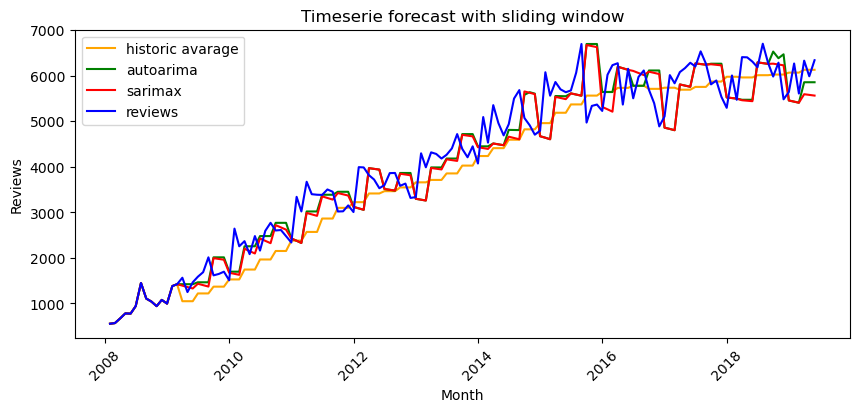

In [101]:
#plot
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['historic_avarage'], color= 'orange', label= 'historic avarage') 
plt.plot(df['date'], df['autoarima'],color='green', label= 'autoarima')  
plt.plot(df['date'], df['sarima'],color='red' , label= 'sarimax')   
plt.plot(df['date'], df['count'], color='blue', label= 'reviews') 
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('Timeserie forecast with sliding window')
plt.xticks(rotation=45)
plt.legend()
plt.show()

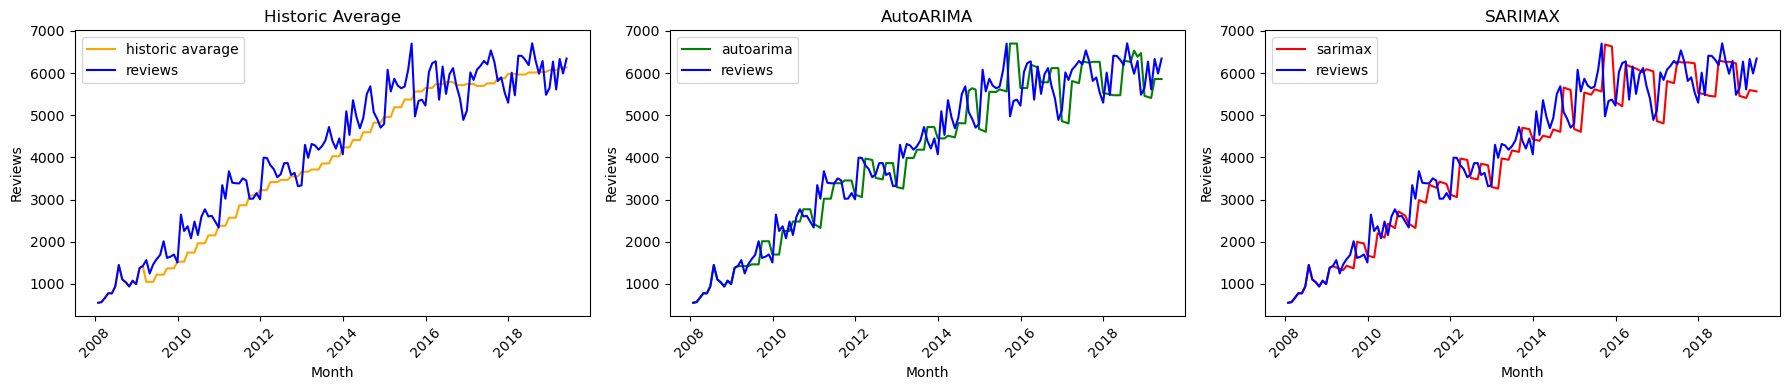

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # 1 row, 3 columns for the plots

# Plot 1: Historic Average
axes[0].plot(df['date'], df['historic_avarage'], color= 'orange', label= 'historic avarage') 
axes[0].plot(df['date'], df['count'], color= 'blue', label= 'reviews') 
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Historic Average')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Plot 2: AutoARIMA
axes[1].plot(df['date'], df['autoarima'], color='green', label='autoarima')
axes[1].plot(df['date'], df['count'], color= 'blue', label= 'reviews')   
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Reviews')
axes[1].set_title('AutoARIMA')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# Plot 3: SARIMAX
axes[2].plot(df['date'], df['sarima'], color='red', label='sarimax')
axes[2].plot(df['date'], df['count'], color= 'blue', label= 'reviews') 
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Reviews')
axes[2].set_title('SARIMAX')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend()

plt.tight_layout()  # Adjusts space between plots
plt.show()

In [100]:
#Metrics
actual = df['count']


rmse_results = []
mae_results = []
mape_results = []
mase_results = []


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# List of forecast models in the DataFrame
forecast_models = ['historic_avarage', 'sarima', 'autoarima']

for model in forecast_models:
    forecast = df[model]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    rmse_results.append((model, rmse))
    
    # Calculate MAE
    mae = mean_absolute_error(actual, forecast)
    mae_results.append((model, mae))
    
    # Calculate MAPE
    mape = calculate_mape(actual, forecast)
    mape_results.append((model, mape))

# Create a DataFrame to summarize the metrics
metrics_df = pd.DataFrame({
    'Model': forecast_models,
    'RMSE': [x[1] for x in rmse_results],
    'MAE': [x[1] for x in mae_results],
    'MAPE': [x[1] for x in mape_results],
})

print(metrics_df)

              Model        RMSE         MAE       MAPE
0  historic_avarage  491.638258  394.791983  10.177361
1            sarima  548.199947  407.617578   9.545228
2         autoarima  534.767991  395.350613   9.294022
